Importar a biblioteca sklearn (scikit learn), responsável pelos algoritmos de "machine learning clássicos".
Importar graphviz para visualização da árvore de decisão

In [118]:
from sklearn import tree
import pandas as pd
import graphviz

Renomeei as colunas para facilitar a manipulação

In [119]:
df = pd.read_csv("data_diagnostico.csv", index_col="Paciente")
df.columns = ["febre", "dor", "manchas", "coceira", "dia"]
df

,febre,dor,manchas,coceira,dia
Paciente,,,,,
P1,Alta,Frequente,Presente,Intensa,Emergência
P2,Moderada,Rara,Presente,Inexistente,Urgência
P3,Nenhuma,Frequente,Ausente,Inexistente,Mais_Exames
P4,Alta,Frequente,Ausente,Intensa,Emergência
P5,Moderada,Permanente,Presente,Inexistente,Urgência
P6,Moderada,Permanente,Ausente,Intensa,Urgência
P7,Alta,Permanente,Presente,Inexistente,Emergência
P8,Alta,Permanente,Ausente,Inexistente,Emergência
P9,Moderada,Frequente,Ausente,Moderada,Mais_Exames


Importante: mapear todas as classes para números. A classe requer que todos os atributos sejam inteiros ou floats para fazer as comparações.

In [120]:
dfc = df.copy()

febre_map = {"Alta": 2, "Moderada": 1, "Nenhuma": 0}
dor_map = {"Permanente": 2, "Frequente": 1, "Rara": 0}
manchas_map = {"Presente": 1, "Ausente": -1}
coceira_map = {"Intensa": 2, "Moderada": 1, "Inexistente": 0}
dia_map = {"Emergência": 2, "Urgência": 1, "Mais_Exames": 0}

dfc.febre = dfc.febre.apply(lambda x: febre_map[x])
dfc.dor = dfc.dor.apply(lambda x: dor_map[x])
dfc.manchas = dfc.manchas.apply(lambda x: manchas_map[x])
dfc.coceira = dfc.coceira.apply(lambda x: coceira_map[x])
dfc.dia = dfc.dia.apply(lambda x: dia_map[x])

Separar tabela em X e Y, ou seja, input e output.
O diagnóstico é a coluna de output, e o resto é a coluna de input.

In [121]:
x = dfc[["febre", "dor", "manchas", "coceira"]]
y = dfc["dia"]

In [122]:
x

,febre,dor,manchas,coceira
Paciente,,,,
P1,2,1,1,2
P2,1,0,1,0
P3,0,1,-1,0
P4,2,1,-1,2
P5,1,2,1,0
P6,1,2,-1,2
P7,2,2,1,0
P8,2,2,-1,0
P9,1,1,-1,1


In [123]:
y

Paciente
P1     2
P2     1
P3     0
P4     2
P5     1
P6     1
P7     2
P8     2
P9     0
P10    2
P11    0
P12    1
Name: dia, dtype: int64

In [124]:
def print_tree(t):
  """Função para printar a árvore de decisão de maneira bonitinha. Simplesmente encapsula as funções da graphviz

  Args:
      t (tree): a árvore de decisão treinada

  Returns:
      retorna a imagem renderizada
  """
  a = tree.export_graphviz(t, None, feature_names=["Febre", "Dor_Muscular", "Manchas", "Coceira"], class_names=['Mais Exames', 'Urgência', 'Emergência'], filled=True, rounded=True)
  graph = graphviz.Source(a) 
  return graph

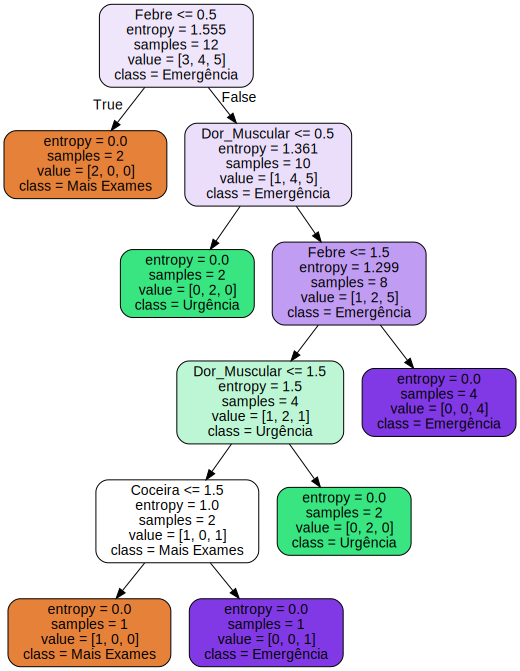

In [125]:
t = tree.DecisionTreeClassifier(criterion="entropy")
t = t.fit(x, y)
t

print_tree(t)

Podemos ver que, já que temos poucos dados e treinamos com o dataset inteiro, temos 100% de acerto no conjunto de treino

In [126]:
taxa_de_acerto = (t.predict(x) == y).sum()/len(y)
f"{taxa_de_acerto*100}% de acerto"

'100.0% de acerto'